In [97]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider
%matplotlib widget

P, T, t, m, x, T_lim = symbols('P, T, t, m, L, t_max', real=True, positive=True) #display variables differently
g = symbols('g')
v = sqrt(2*P*t/m)
x_T = integrate(v, t).subs({t: T})
T_x = list(solveset(Eq(x, x_T), T, domain=S.Reals))[0]
T_f = Piecewise((T_x, T_x < T_lim), (T_lim, T_x >= T_lim))
v_T = v.subs({t:T_f})
h = v_T**2/(2*g)
agility = h / (T_f + sqrt(2*h/g))
# display(x_T, T_f, v_T)

spring_eff = symbols('η_spring')
h_latched = P*T_lim/(m*g) * spring_eff
agility_latched = h_latched / (T_lim + sqrt(2*h_latched/g))

simplify(T_f)

Piecewise((3**(2/3)*L**(2/3)*m**(1/3)/(2*P**(1/3)), t_max > 3**(2/3)*L**(2/3)*m**(1/3)/(2*P**(1/3))), (t_max, True))

In [83]:
display(Eq(symbols('h_direct'), simplify(h)))
display(Eq(symbols('h_latched'), simplify(h_latched)))


Eq(h_direct, Piecewise((3**(2/3)*L**(2/3)*P**(2/3)/(2*g*m**(2/3)), t_max > 3**(2/3)*L**(2/3)*m**(1/3)/(2*P**(1/3))), (P*t_max/(g*m), True)))

Eq(h_latched, P*t_max*η_spring/(g*m))

interactive(children=(FloatSlider(value=0.15, description='x_val', max=0.3, step=0.01), FloatSlider(value=0.4,…

<function __main__.plot_sliders(x_val, m_val, P_val, T_lim_val, spring_eff_val)>

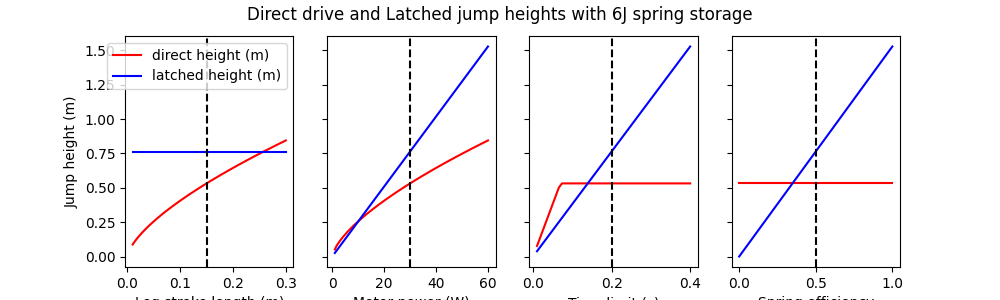

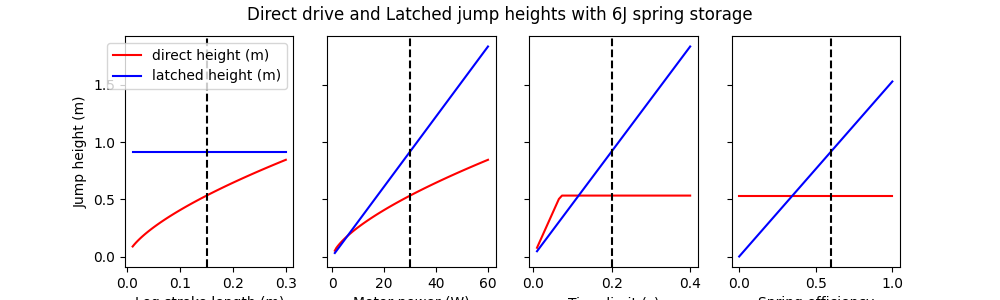

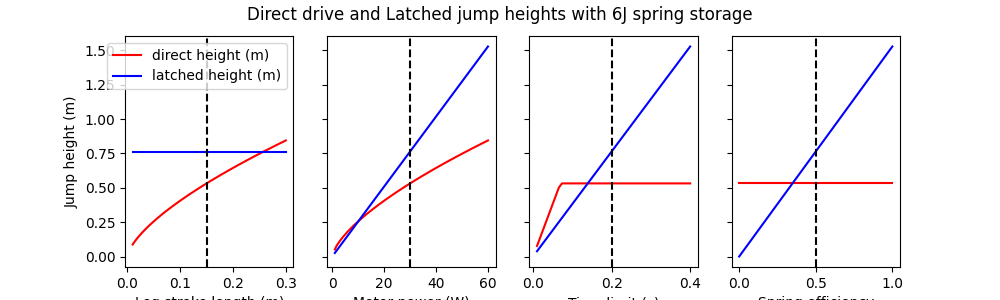

In [86]:
g_val = 9.81
h = h.subs({g:g_val})
h_latched = h_latched.subs({g:g_val})
agility = agility.subs({g:g_val})
agility_latched = agility_latched.subs({g:g_val})

def plot_sliders(x_val, m_val, P_val, T_lim_val, spring_eff_val):
    # fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
    fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(10, 3), sharey=True)
    # fig.tight_layout()    

    x_vals = np.linspace(0.01, 0.3, 100)
    h_vals = np.zeros_like(x_vals)
    agility_vals = np.zeros_like(x_vals)
    h_latched_vals = np.zeros_like(x_vals)
    agility_latched_vals = np.zeros_like(x_vals)
    for i in range(len(x_vals)):
        h_vals[i] = h.subs({x: x_vals[i], m:m_val, P:P_val, T_lim:T_lim_val})
        agility_vals[i] = agility.subs({x: x_vals[i], m:m_val, P:P_val, T_lim:T_lim_val})
        h_latched_vals[i] = h_latched.subs({x: x_vals[i], m:m_val, P:P_val, T_lim:T_lim_val, spring_eff:spring_eff_val})
        agility_latched_vals[i] = agility_latched.subs({x: x_vals[i], m:m_val, P:P_val, T_lim:T_lim_val, spring_eff:spring_eff_val})
    ax1.plot(x_vals, h_vals, color='red', label='direct height (m)')
    # ax1.plot(x_vals, agility_vals, color='orange')
    ax1.plot(x_vals, h_latched_vals, color='blue', label='latched height (m)')
    # ax1.plot(x_vals, agility_latched_vals, color='green')
    ax1.axvline(x=x_val, color='k', linestyle='--')
    ax1.set_xlabel('Leg stroke length (m)')
    # ax1.set_title('wrt leg length')

    P_vals = np.linspace(1, 60, 100)
    h_vals = np.zeros_like(P_vals)
    agility_vals = np.zeros_like(P_vals)
    h_latched_vals = np.zeros_like(P_vals)
    agility_latched_vals = np.zeros_like(P_vals)
    for i in range(len(P_vals)):
        h_vals[i] = h.subs({x: x_val, m:m_val, P:P_vals[i], T_lim:T_lim_val})
        agility_vals[i] = agility.subs({x: x_val, m:m_val, P:P_vals[i], T_lim:T_lim_val})
        h_latched_vals[i] = h_latched.subs({x: x_val, m:m_val, P:P_vals[i], T_lim:T_lim_val, spring_eff:spring_eff_val})
        agility_latched_vals[i] = agility_latched.subs({x: x_val, m:m_val, P:P_vals[i], T_lim:T_lim_val, spring_eff:spring_eff_val})
    ax2.plot(P_vals, h_vals, color='red')
    # ax2.plot(P_vals, agility_vals, color='orange')
    ax2.plot(P_vals, h_latched_vals, color='blue')
    # ax2.plot(P_vals, agility_latched_vals, color='green')
    ax2.axvline(x=P_val, color='k', linestyle='--')
    ax2.set_xlabel('Motor power (W)')
    # ax2.set_title('wrt leg length')

    T_lim_vals = np.linspace(0.01, 0.4, 50)
    h_vals = np.zeros_like(T_lim_vals)
    agility_vals = np.zeros_like(T_lim_vals)
    h_latched_vals = np.zeros_like(T_lim_vals)
    agility_latched_vals = np.zeros_like(T_lim_vals)
    for i in range(len(T_lim_vals)):
        h_vals[i] = h.subs({x: x_val, m:m_val, P:P_val, T_lim:T_lim_vals[i]})
        agility_vals[i] = agility.subs({x: x_val, m:m_val, P:P_val, T_lim:T_lim_vals[i]})
        h_latched_vals[i] = h_latched.subs({x: x_val, m:m_val, P:P_val, T_lim:T_lim_vals[i], spring_eff:spring_eff_val})
        agility_latched_vals[i] = agility_latched.subs({x: x_val, m:m_val, P:P_val, T_lim:T_lim_vals[i], spring_eff:spring_eff_val})
    ax3.plot(T_lim_vals, h_vals, color='red')
    # ax3.plot(T_lim_vals, agility_vals, color='orange')
    ax3.plot(T_lim_vals, h_latched_vals, color='blue')
    # ax3.plot(T_lim_vals, agility_latched_vals, color='green')
    ax3.axvline(x=T_lim_val, color='k', linestyle='--')
    ax3.set_xlabel('Time limit (s)')
    # ax3.set_title('wrt leg length')

    spring_eff_vals = np.linspace(0, 1, 100)
    h_vals = np.zeros_like(spring_eff_vals)
    agility_vals = np.zeros_like(spring_eff_vals)
    h_latched_vals = np.zeros_like(spring_eff_vals)
    agility_latched_vals = np.zeros_like(spring_eff_vals)
    for i in range(len(spring_eff_vals)):
        h_vals[i] = h.subs({x: x_val, m:m_val, P:P_val, T_lim:T_lim_val})
        agility_vals[i] = agility.subs({x: x_val, m:m_val, P:P_val, T_lim:T_lim_val})
        h_latched_vals[i] = h_latched.subs({x: x_val, m:m_val, P:P_val, T_lim:T_lim_val, spring_eff:spring_eff_vals[i]})
        agility_latched_vals[i] = agility_latched.subs({x: x_val, m:m_val, P:P_val, T_lim:T_lim_val, spring_eff:spring_eff_vals[i]})
    latched_joules = str(m_val * g_val * h_latched.subs({x: x_val, m:m_val, P:P_val, T_lim:T_lim_val, spring_eff:spring_eff_val}) / spring_eff_val).rstrip('0').rstrip('.')
    ax4.plot(spring_eff_vals, h_vals, label='direct height (m)', color='red')
    # ax4.plot(spring_eff_vals, agility_vals, label='direct agility (m/s)', color='orange')
    # ax4.plot(spring_eff_vals, h_latched_vals, label=f'latched height (m) {round(float(latched_joules)*spring_eff_val,2)}J realized', color='blue')
    ax4.plot(spring_eff_vals, h_latched_vals, label=f'latched height (m)', color='blue')
    # ax4.plot(spring_eff_vals, agility_latched_vals, label='latched agility (m/s)', color='green')
    ax4.axvline(x=spring_eff_val, color='k', linestyle='--')
    ax4.set_xlabel('Spring efficiency')

    # fig.suptitle(f'{latched_joules}J spring storage')
    fig.suptitle(f'Direct drive and Latched jump heights with {latched_joules}J spring storage')
    # ax4.set_title('wrt time limit')

    
    ax1.legend()
    ax1.set_ylabel("Jump height (m)")

    plt.figure()

    plt.show()

interact(
    plot_sliders, 
    x_val=FloatSlider(min=0, max=0.3, step=0.01, value=0.15), 
    m_val=FloatSlider(min=0.1, max=0.7, step=0.01, value=0.4), 
    P_val=FloatSlider(min=1, max=60.0, step=1, value=30), 
    T_lim_val=FloatSlider(min=0, max=0.5, step=0.01, value=0.2), 
    spring_eff_val=FloatSlider(min=0, max=1, step=0.1, value=0.5)
)